In [1]:
import os
import pandas
from benchmarkit import BenchmarKit
import time
from contextlib import closing

data = pandas.read_csv('data/data.csv', parse_dates=['birth_date'])

input_kwargs = {
    "args": [
        (data.head(1000),),
        (data.head(10000),),
        (data.head(100000),),
        (data.head(1000000),),
    ],
    "labels": ["10³", "10⁴", "10⁵", "10⁶"],
}


# Looping over pandas.DataFrame

`pandas` offers different ways to iterate over `DataFrame` rows: 
1. `DataFrame.iterrows`
2. `DataFrame.itertuples`
3. `DataFrame.iteritems`

While these functions tries to accomplish the same thing. The performance cost is different, especially in the case of a large `DataFrame`. 


In [ ]:

#** functions

def itertuples(data: pandas.DataFrame):
    [_ for _ in data.itertuples()]

def iterrows(data: pandas.DataFrame):
    [_ for _ in data.iterrows()]

def iteritems(data: pandas.DataFrame):
    [_ for _ in data.iteritems()]

#** benchmarking 

benchmarks = BenchmarKit.benchmark(
    funcs=[
        iteritems,
        itertuples,
        iterrows
    ],
    args=[
        (data.head(1000),),
        (data.head(10000),),
        (data.head(100000),),
        (data.head(1000000),),
    ],
    labels=["10³", "10⁴", "10⁵", "10⁶"],
)

benchmarks.plot()

# Computing a new columns

100%|██████████| 16/16 [00:10<00:00,  1.50it/s]


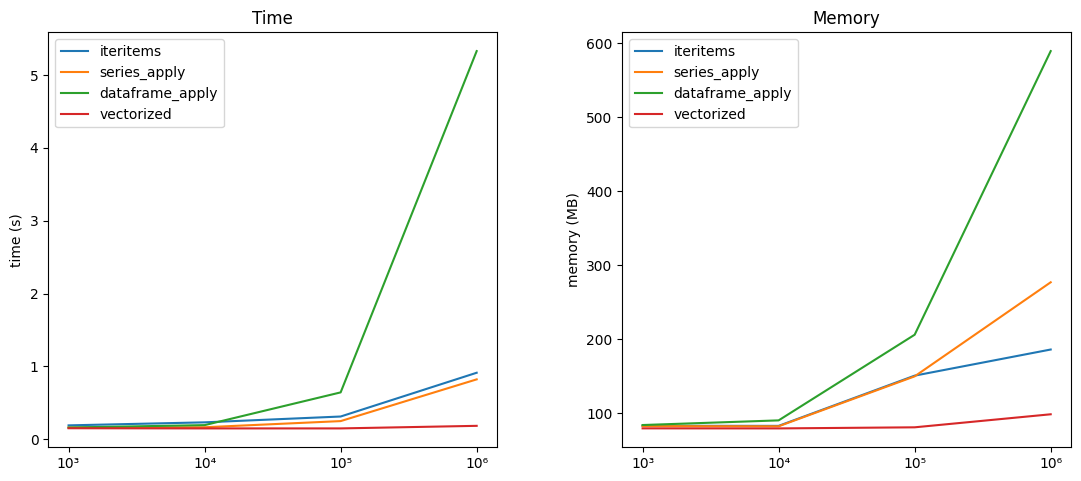

In [2]:
def iteritems(data: pandas.DataFrame):
    pandas.Series([v.year > 1990 for _, v in data['birth_date'].iteritems()])

def series_apply(data: pandas.DataFrame):
    data['birth_date'].apply(lambda x: x.year > 1990)

def dataframe_apply(data: pandas.DataFrame):
    data.apply(lambda x: x.birth_date.year > 1990, axis=1)

def vectorized(data: pandas.DataFrame):
    data['birth_date'].dt.year > 1990


benchmarks = BenchmarKit.benchmark(
    funcs=[
        iteritems,
        series_apply,
        dataframe_apply,
        vectorized,
    ],
    args=[
        (data.head(1000),),
        (data.head(10000),),
        (data.head(100000),),
        (data.head(1000000),),
    ],
    labels=["10³", "10⁴", "10⁵", "10⁶"],)

benchmarks.plot()